In [ ]:
# CHANAN ARTAMMA
# chanan.artama@gmail.com

In [ ]:
import requests
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Download the dataset
url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
local_zip = 'rockpaperscissors.zip'
with requests.get(url, stream=True) as r:
    with open(local_zip, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

In [ ]:
# Extract
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# Define paths
base_dir = 'rockpaperscissors/rps-cv-images'

In [ ]:
# Data dipecah kedalam mode training dan set validasi
datagen = ImageDataGenerator(
    validation_split=0.4,
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Setting modelnya sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Model di compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 17, 128)       0

In [ ]:
#Fungsi early stopping kalau sudah mencapai 98% / restore model ke yang terbaik apabila epoch sebelumnya lebih tinggi dari yang baru
accuracy_threshold = 98e-2
class cb(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy') >= accuracy_threshold:
      print('\nFor epoch', epoch,
         '\nAccuracy has reach %2.2f%%' %(logs['accuracy']*100),
         ', training hass been stopped')
      self.model.stop_training = True


In [ ]:
# Melatih Model
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    validation_data=validation_generator,
    validation_steps=5,
    epochs=25,
    verbose=2,
    callbacks=[cb()]
)

Epoch 1/25
25/25 - 14s - loss: 1.0871 - accuracy: 0.3948 - val_loss: 0.9705 - val_accuracy: 0.6812 - 14s/epoch - 548ms/step
Epoch 2/25
25/25 - 6s - loss: 0.8171 - accuracy: 0.6481 - val_loss: 0.4021 - val_accuracy: 0.8562 - 6s/epoch - 256ms/step
Epoch 3/25
25/25 - 5s - loss: 0.3943 - accuracy: 0.8714 - val_loss: 0.2562 - val_accuracy: 0.9062 - 5s/epoch - 216ms/step
Epoch 4/25
25/25 - 7s - loss: 0.3028 - accuracy: 0.8961 - val_loss: 0.3188 - val_accuracy: 0.8687 - 7s/epoch - 268ms/step
Epoch 5/25
25/25 - 8s - loss: 0.2771 - accuracy: 0.9039 - val_loss: 0.2881 - val_accuracy: 0.9000 - 8s/epoch - 326ms/step
Epoch 6/25
25/25 - 6s - loss: 0.2423 - accuracy: 0.9112 - val_loss: 0.2721 - val_accuracy: 0.9125 - 6s/epoch - 222ms/step
Epoch 7/25
25/25 - 7s - loss: 0.2078 - accuracy: 0.9287 - val_loss: 0.1286 - val_accuracy: 0.9688 - 7s/epoch - 268ms/step
Epoch 8/25
25/25 - 5s - loss: 0.2390 - accuracy: 0.9091 - val_loss: 0.2391 - val_accuracy: 0.8938 - 5s/epoch - 218ms/step
Epoch 9/25
25/25 - 7s 

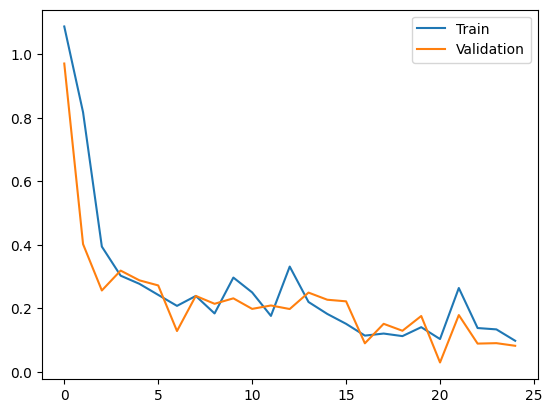

In [ ]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

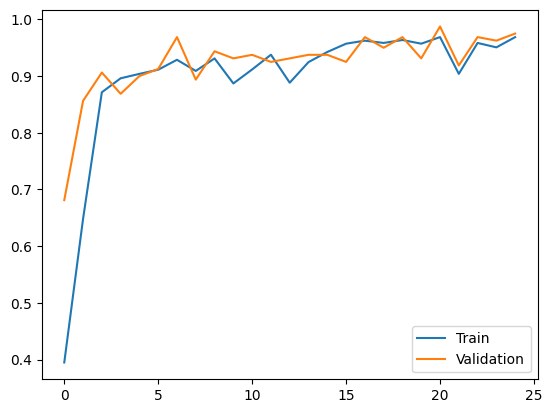

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()

In [ ]:
# Model di Save
model.save('rps_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving batu.jpeg to batu.jpeg
1/1 [==============================] - 0s 393ms/step


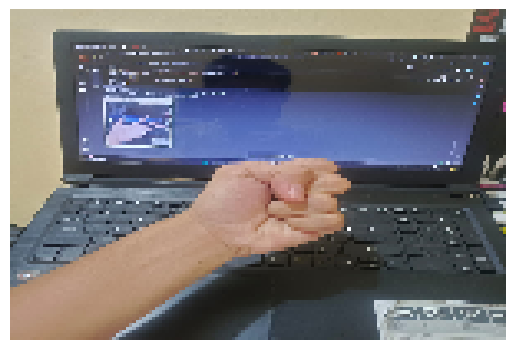

batu.jpeg
Image Classifier: Rock


In [ ]:
# Melakukan upload file kemudian di deteksi
uploaded = files.upload()

for fn in uploaded.keys():

# predik image
  path = fn
  img = image.load_img(path, target_size=(100,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()

  print(fn)
  if classes[0,0]==1:
      print('Image Classifier: Rock')
  elif classes[0,1]==1:
      print('Image Classifier: Paper')
  elif classes[0,2]==1:
      print('Image Classifier: Scissor')
  else:
      print('Image Classifier: None')


In [ ]:
print ('Chanan artamma')
print ('chanan.artama@gmail.com')


Chanan artamma
chanan.artama@gmail.com
